# Import common library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
os.chdir('C:\\Users\\user\\Documents\\Machine-Learning\\data')

# Introduction to Machine Learning (Week 1)

# Linear Regression (Week 2, Chapter 3)

## using statsmodel

In [10]:
import statsmodels.api as sm
boston = pd.read_csv('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
x = pd.DataFrame({'intercept':np.ones(boston.shape[0]),
                  'lstat':boston['lstat']})
type(x)

pandas.core.frame.DataFrame

In [12]:
# ways to constant term to predictor variable
x1 = sm.add_constant(boston['lstat'])

x2 = pd.DataFrame({'const': np.ones(boston['lstat'].shape[0]), 'lstat': boston.lstat})
x2

,const,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [13]:
model = sm.OLS(boston['medv'], x2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 03 May 2025   Prob (F-statistic):           5.08e-88
Time:                        11:34:44   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using scikit-learn

# Classification (Week 3, Chapter 4)

In [15]:
default = pd.read_csv('default.csv')
print(default.head(10))
print('--------------------------------------------')
print(default.shape)

  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879
5      No     Yes   919.588530   7491.558572
6      No      No   825.513331  24905.226578
7      No     Yes   808.667504  17600.451344
8      No      No  1161.057854  37468.529288
9      No      No     0.000000  29275.268293
--------------------------------------------
(10000, 4)


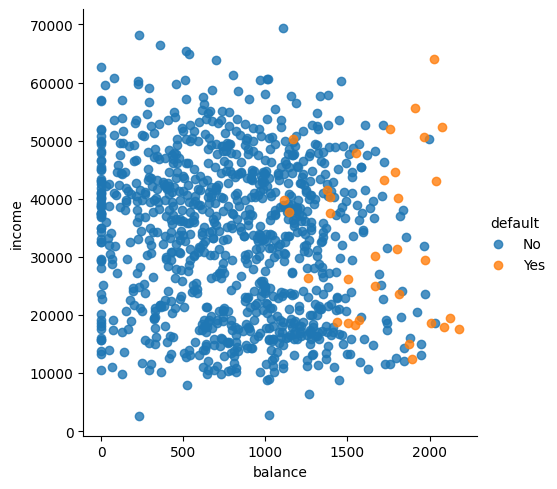

In [16]:
# plot 
sns.lmplot(x='balance', y='income', data=default.sample(1000), hue='default', fit_reg=False)
plt.show();

income does not influence whether a person default or not but balance does influence where a person with higher balance is more likely to default than a person with a lower balance.

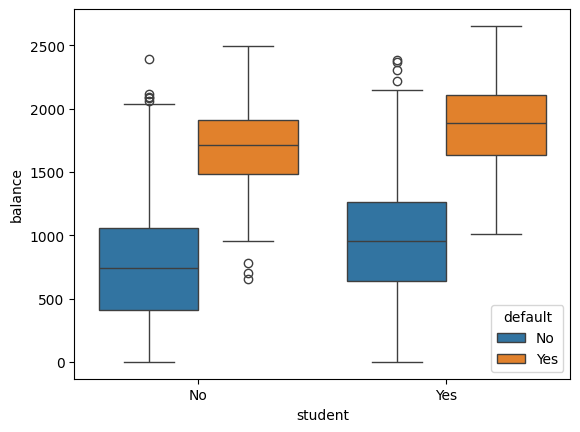

In [17]:
sns.boxplot(x='student', y='balance', data=default, hue='default');

Student or not does not effect whether a person is a defaulter or not.

In [18]:
default['Yes'] = (default['default'] == 'Yes').astype(int)
default.head(10)

,default,student,balance,income,Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0
5,No,Yes,919.588530,7491.558572,0
6,No,No,825.513331,24905.226578,0
7,No,Yes,808.667504,17600.451344,0
8,No,No,1161.057854,37468.529288,0
9,No,No,0.000000,29275.268293,0


In [41]:
import statsmodels.formula.api as smf
smf.logit(formula='Yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


# Resampling Methods (Week 4, Chapter 5)

## Cross-Validation

In [22]:
auto = pd.read_csv('auto.csv')
print(auto.shape)
print('-------------')
auto.head(10)

(392, 9)
-------------


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [63]:
# manual way to split train test set
training = auto.sample(196, random_state=1)
test = auto[~auto.isin(training)].dropna()

In [74]:
x_train = training['horsepower'].values.reshape(-1,1)
y_train = test['mpg']
x_test = test['horsepower'].values.reshape(-1, 1)
y_test = test['mpg']

In [75]:
# fit train data in a linear regression model
import sklearn.linear_model as slm
model = slm.LinearRegression().fit(x_train, y_train)

# predict x values using the test set
prediction = model.predict(x_test)

# calculate MSE using y_test(actual values) and prediction(fitted values)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, prediction)
print(round(MSE,2))

52.43


In [84]:
# fit train data into a quadratic equation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

model2 = slm.LinearRegression().fit(x_train2, y_train)
mse2= mean_squared_error(y_test, model2.predict(x_test2))
print(round(mse2, 2))

52.86


In [88]:
# cubic equation
cubic = PolynomialFeatures(degree=3)
x_train3 = cubic.fit_transform(x_train)
x_test3 = cubic.fit_transform(x_test)

model3 = slm.LinearRegression().fit(x_train3, y_train)
mse3 = mean_squared_error(y_test, model3.predict(x_test3))
print(round(mse, 2))

52.86


### Leave one out cross validation

### k-Fold Cross-Validation

## Bootstrap

# Linear Model Selection (Week 5, Chapter 6)

In [11]:
# import datasets
from sklearn.datasets import fetch_openml
boston = fetch_openml('boston')
boston_df = boston.frame

# EDA
print(boston_df.head())
print('--------------------------------------------')
print(boston_df.shape)
print('--------------------------------------------')
print(boston_df.describe())
print('--------------------------------------------')

# feature selection
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=8)
print(selector)


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
--------------------------------------------
(506, 14)
--------------------------------------------
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\datasets\_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


### Forward Selection

In [26]:
hitters_df = pd.read_csv('hitters.csv')
hitters_df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,#NAME?,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,#NAME?,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,#NAME?,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,#NAME?,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,#NAME?,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [27]:
# calculate the number of missing rows in Salary column
hitters_df['Salary'].isnull().sum()

np.int64(59)

In [28]:
hitters_df.shape

(322, 21)

In [29]:
# remove any rows that contain missing values, along with the player names
hitters_df_clean = hitters_df.dropna().drop('Unnamed: 0', axis=1)
hitters_df_clean.shape

(263, 20)

In [30]:
def nCp(sigma2, estimator, X, Y):
    n, p = X.shape
    Yhat = esimator.predict(X)
    RSS = np.sum((Y - Yhat) ** 2)
    return -(RSS + 2 * p * sigma2) / n

In [31]:
n = hitters_df_clean.shape
type(n)

tuple

In [32]:
# one-hot encoding categorical data to convert into numerical data
dummies = pd.get_dummies(hitters_df_clean[['League', 'Division', 'NewLeague']])
dummies.head(10)

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False
6,False,True,True,False,True,False
7,True,False,False,True,True,False
8,False,True,False,True,False,True
9,True,False,True,False,True,False
10,True,False,True,False,True,False


In [33]:
# drop column with independent variable (salary) and columns for which we created dummy variable (league, division, new league)
y = hitters_df_clean.Salary
x_ = hitters_df_clean.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
x = pd.concat([x_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,True,False,True
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,True,False,True
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,False,False,False
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,False,True,False
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,False,False,False


In [34]:
import statsmodels.api as sm
sm.OLS(hitters_df_clean['Salary'], hitters_df_clean['Hits']).fit()

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(hitters_df_clean['Hits'].values.reshape(-1,1), hitters_df_clean['Salary'])
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: 63.04881890502094
Coefficient: [4.38543911]


In [ ]:
x = [10,23,32]
x.astype(float)

# Nonlinear models (Week 6, Chapter 7)

<h1> Trial and Error</h1>

# Deep Learning

In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# load data
iris = load_iris()

# take only the third column
x = iris.data[:, (2, 3)]
y = (iris.target == 0)
df = pd.DataFrame({"Petal Length":iris.data[:, 2]})
x
                  

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,